<h1> Ethereum Fraud Detection EDA </h1>

<h3>the purpose of this notebook is to gain a better understanding of the data. The following questions are going to be asked:</h3>
<h4>Q1. Do we have any missing values?</h4>
<h4>Q2. Is the data balanced?</h4>
<h4>Q3. Is the data skewed?</h4>
<h4>Q4. What feature values often belong to fraud accounts?</h4>

In [1]:
import sys
sys.path.append("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from data_preprocessing.preprocessor import Preprocessor

sns.set_style('darkgrid')
pd.set_option('display.max_columns',500)

In [3]:
df = pd.read_csv('../datasets/final_combined_dataset.csv')

This is the `Preprocessor` class being called. All I am doing for now is removing unneeded features

In [4]:
preprocessor = Preprocessor(df)
preprocessor.remove_features()

In [245]:
df.head(5)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,810,865.691093,586.466675,-279.224419,265.0,3.558854e+07,3.560317e+07,30.0,54.0,58.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,102,3.087297,3.085478,-0.001819,8.0,4.034283e+02,2.260809e+00,1.0,5.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,12,3.588616,3.589057,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,7.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,34,1750.045862,895.399559,-854.646303,14.0,1.711105e+04,1.141223e+04,2.0,11.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,4619,104.318883,53.421897,-50.896986,42.0,1.628297e+05,1.235399e+05,4.0,23.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

Straight away, we can see that there are several features with missing values. Either Imputation or Removal will be required

In [234]:
df.skew()

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
total tran

We can also see here that the majority of our features are heavily skewed, so we will have to apply feature engineering and possibly some transformations to the features

In [235]:
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,283.362362,1.016092e+04,1.163832e+04,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,5.638038,7.598535,4.901909,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,1352.404013,3.583227e+05,3.642048e+05,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,105.252500,81.818470,17.246576,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,4.000000,2.262059e-01,2.670424e+00,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,8.000000,1.248680e+01,3.052963e+01,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,54.000000,1.009990e+02,1.010000e+02,4.452000e-02,3.000000,1.003370e+02,0.000000e+00,0.000000,2.000000,2.000000,0.001523,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000,19995.000000,2.858096e+07,2.858159e+07,1.428864e+07,10001.000000,1.000020e+12,1.120000e+11,6582.000000,4293.000000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10


Here we can seew that the features all lie in different ranges. Usually, we would normalise our features before training, however I am going to use a tree-based model, so normalisation is not needed here

<h1>Q1. Do we have any missing values?</h1>

In [248]:
df.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
total transactions (including tnx to create contract      0
total Ether sent                        

We can see that there are 12 features, each missing 829 rows. In other words:

In [258]:
print('Percentage of missing rows: ' + str(round(((829/len(df)) * 100),1)) + '%') 

Percentage of missing rows: 8.4%


8.4% of our data is missing. Possible courses of action:

1. Drop NaN value rows
2. Impute NaN value rows

Let's take a closer look the rows with missing values:

In [275]:
df[df.isnull().T.any()]

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent
7662,1,1457.31,34.12,4815.43,3,13,0,10,3,1.000000,2.501052,1.348445,1.000875,11.277872,5.842916,16,17.528747,17.529785,0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7666,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,1,0.00,0.00,15432.58,1,1,0,1,1,1.000000,1.000000,1.000000,0.999538,0.999538,0.999538,2,0.999538,1.000000,0.000462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,1,0.00,0.00,0.00,0,1,0,1,0,0.001540,0.001540,0.001540,0.000000,0.000000,0.000000,1,0.000000,0.001540,0.001540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,1,259.52,2.60,4417.03,17,2,5,2,6,0.003349,0.070000,0.036675,0.000000,0.044494,0.003218,24,0.054714,0.073349,0.018635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,1,193.09,81.82,1485.80,6,4,0,3,6,0.000100,8.293050,2.598288,0.312210,7.013525,1.731872,10,10.391234,10.393150,0.001916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,1,0.00,49.51,12643.85,1,15,0,15,1,0.020005,5.000000,1.025080,15.375782,15.375782,15.375782,16,15.375782,15.376202,0.000420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,1,0.00,0.00,8427.92,0,1,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, we notice something; all the missing values seem to belong to fraudulent accounts. We can confirm this:

In [276]:
df[df.isnull().T.any()]['FLAG'].value_counts()

1    829
Name: FLAG, dtype: int64

Our theory is true; All the missing values are of the positive class!

<h1>Q2: Is the data balanced?</h1>

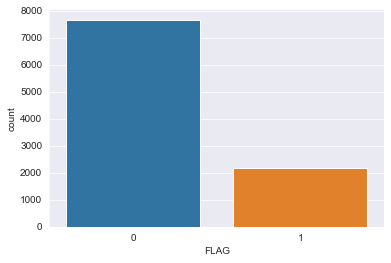

In [9]:
sns.countplot(df['FLAG'])
plt.show()

In [259]:
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [263]:
print('Percentage of non-fraudulent instances: ' + str(round(((7662/len(df)) * 100))) + '%') 

Percentage of missing rows: 78%


In [264]:
print('Percentage of fraudulent instances: ' + str(round(((2179/len(df)) * 100))) + '%') 

Percentage of fraudulent instances: 22%


We can clearly see here that the data is heavily imblanced, with only 22% of the accounts considered as fraudulent. Possible courses of action:

1. Oversampling/Undersampling.
2. Leaving it as it is for the model.

<h1>Q3. Is the data skewed?</h1>

In [277]:
df.skew()

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
total tran

The answer is yes, and we see that some features, such as `ERC20 avg val sent`, are heavily skewed, with most of the weight being on the left tail. Except `total ether balance`, which is slightly skewed to the right

If we plot a KDE plot of `ERC20 avg val sent`:

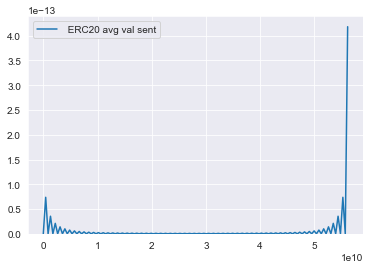

In [313]:
sns.kdeplot(df.dropna()[' ERC20 avg val sent'],bw=1.5)
plt.show()

We get this plot, with some random distribution. However, when we perform a boxcox transformation of the data:

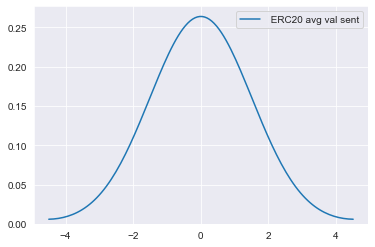

In [322]:
sns.kdeplot(boxcox1p(df.dropna()[' ERC20 avg val sent'],boxcox_normmax(df.dropna()[' ERC20 avg val sent'] + 1)), bw=1.5)
plt.show()

We get data that is normally distributed!

<h1>Q4. What feature values often belong to fraud accounts?</h1>

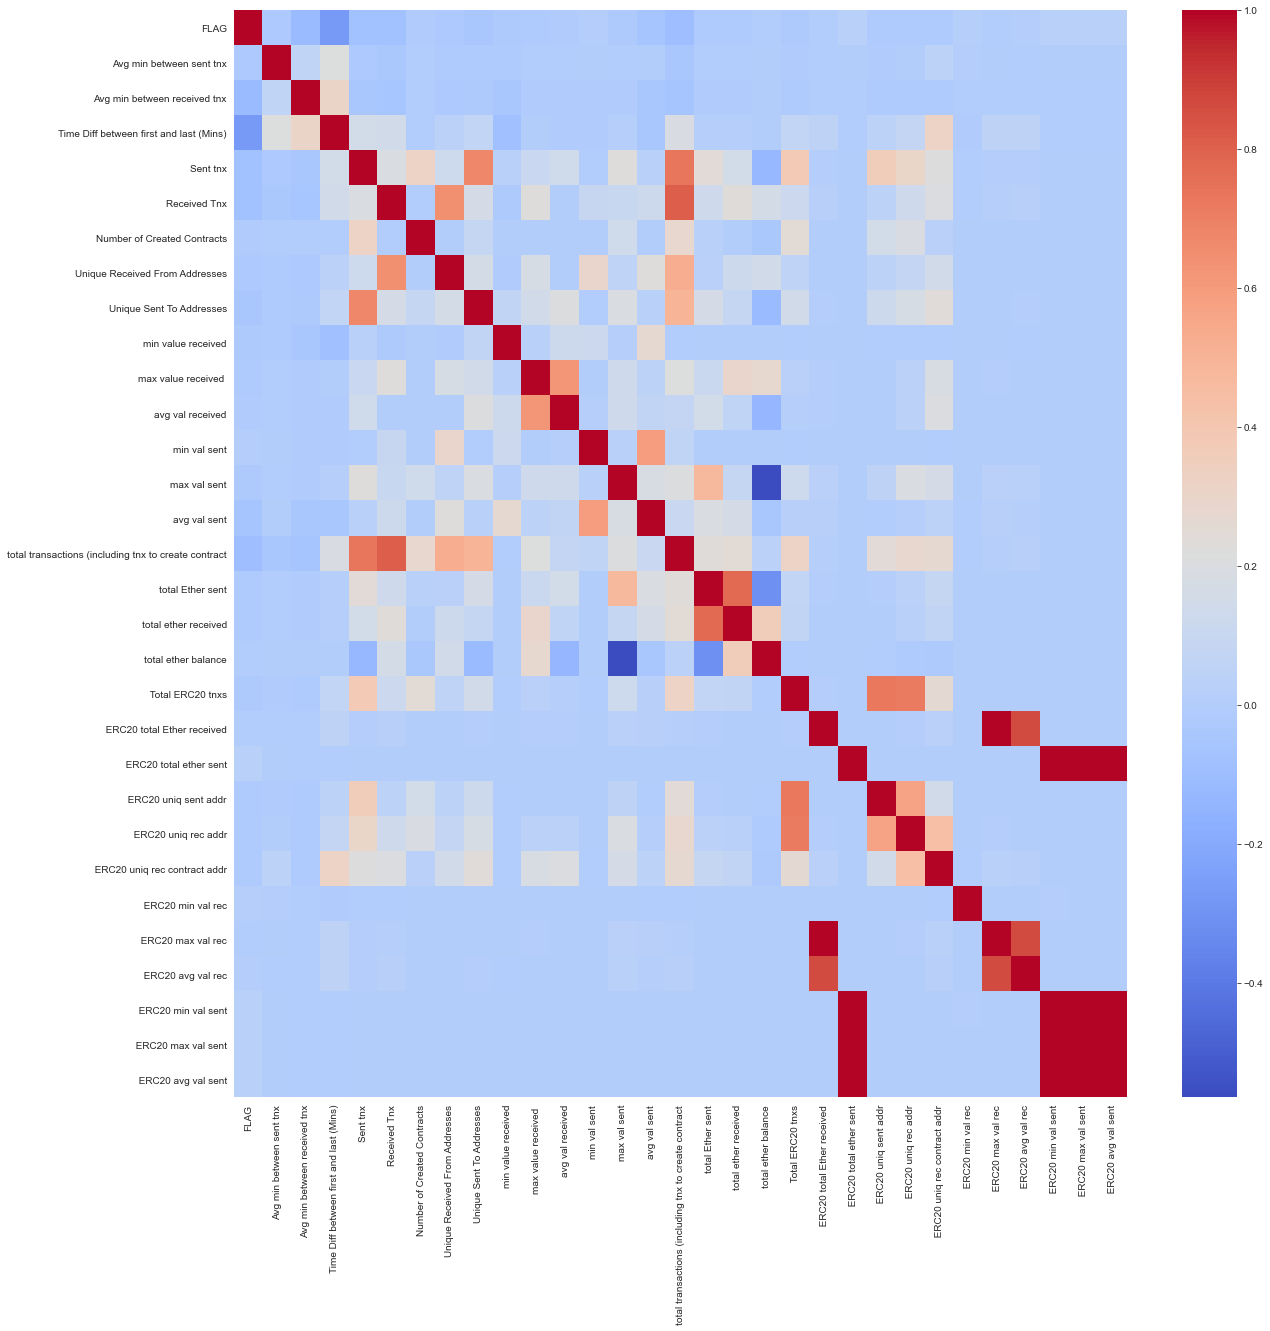

In [346]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm',fmt='')
plt.show()

In [355]:
df.corr()['FLAG'].sort_values(ascending=False)[1:]

 ERC20 min val sent                                     0.025364
 ERC20 avg val sent                                     0.025044
 ERC20 max val sent                                     0.025038
 ERC20 total ether sent                                 0.024762
 ERC20 min val rec                                      0.011163
 ERC20 avg val rec                                      0.007881
min val sent                                            0.006626
total ether balance                                    -0.003229
 ERC20 max val rec                                     -0.004313
 ERC20 total Ether received                            -0.004475
avg val received                                       -0.011881
Number of Created Contracts                            -0.013711
total Ether sent                                       -0.014993
total ether received                                   -0.016900
 ERC20 uniq rec addr                                   -0.017539
 ERC20 uniq rec contract 

As we can see, there seems to be no real correlations at all between features, with the highest correled feature being the `Time Diff between first and last (Mins)`, with a correlation of around -0.26. However, there could be some underlying correlations:

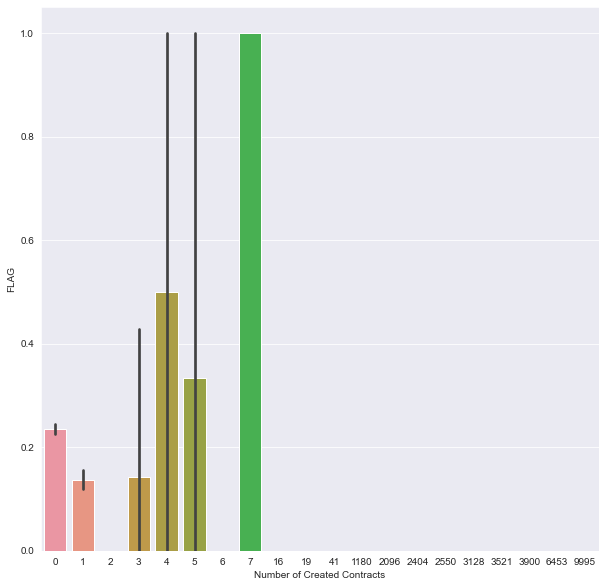

In [361]:
plt.figure(figsize=(10,10))
sns.barplot(df['Number of Created Contracts'],df['FLAG'])

We can see that the more contacts a user has created, the more likely they are to be of a fraudulent transaction